### After the feature engineering, I plan to use LDA to do dimension reduction on y, which is the bag of word model of lyrics.

In [ ]:
import pandas as pd
import numpy as np
import pyLDAvis
import pyLDAvis.gensim as gensimvis
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from gensim import corpora, models, similarities
%matplotlib inline

In [17]:
dta = pd.read_csv('/Users/pengfeiwang/Desktop/prj4/Project4_data/lyr_new.csv',index_col = ['track_id'])

In [5]:
a = dta.apply(lambda x: zip(range(4973),x), axis=1)
Corpus = [i.tolist() for i in a.values]

#### Tune the parameters according to the perplexcity

In [16]:
result = []
for i in [4,7,10,15,20]:
    lda = models.ldamodel.LdaModel(Corpus, num_topics= i)
    perplex = lda.log_perplexity(Corpus)
    result.append(perplex)

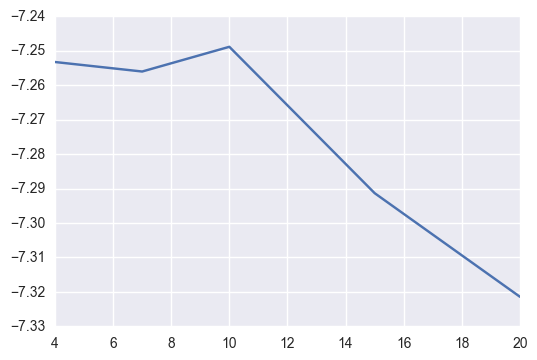

In [23]:
i = [4,7,10,15,20]
plt.plot(i, result)

#### Construct the Corpora and Dictionary for visualization

In [6]:
adict = corpora.Dictionary([['word'+str(i) for i in range(4973)]])

In [9]:
lda = models.ldamodel.LdaModel(Corpus, num_topics= 10, minimum_probability=0)

In [10]:
vis = gensimvis.prepare(lda, Corpus, adict)

In [11]:
pyLDAvis.display(vis)

#### Classify the songs and build distribution among different genres

In [95]:
df = pd.DataFrame(index = dta.index, columns = range(10))
for i in range(2350):
    df.iloc[i] = [j[1] for j in lda[Corpus[i]]]
    
df.to_csv('/Users/pengfeiwang/Desktop/prj4/Project4_data/lda_10.csv')

In [26]:
df = pd.read_csv('/Users/pengfeiwang/Desktop/prj4/Project4_data/lda_10.csv', index_col = ['track_id'])
genre = df.apply(lambda x: np.argmax(x),axis=1)
genre = [int(i) for i in genre]
dta_c = dta.copy()
dta_c['genre'] = genre

In [39]:
freq = pd.DataFrame(index=range(10),columns=dta.columns)
for i in range(int(max(genre))+1):
    count = dta[dta_c.genre == i].sum(axis=0).tolist()
    freq.iloc[i] = [j/float(sum(count)) for j in count]

In [43]:
freq.to_csv('/Users/pengfeiwang/Desktop/prj4/Project4_data/freq.csv')